In [1]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('bmarket.db')
cursor = conn.cursor()

# Get a list of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in bmarket.db:")
for table in tables:
    print(table[0])

# Close the connection
conn.close()

Tables in bmarket.db:
bank_marketing


In [2]:
import sqlite3


# Connect to the SQLite database
conn = sqlite3.connect('bmarket.db')

# Read all data from the 'bank_marketing' table into a pandas DataFrame
df = pd.read_sql_query("SELECT * FROM bank_marketing;", conn)

# Print the DataFrame
print(df)

# Close the connection
conn.close()

       Client ID       Age   Occupation Marital Status      Education Level  \
0          32885  57 years   technician        married          high.school   
1           3170  55 years      unknown        married              unknown   
2          32207  33 years  blue-collar        married             basic.9y   
3           9404  36 years       admin.        married          high.school   
4          14021  27 years    housemaid        married          high.school   
...          ...       ...          ...            ...                  ...   
41183       6266  58 years      retired        married  professional.course   
41184      11285  37 years   management        married    university.degree   
41185      38159  35 years       admin.        married          high.school   
41186        861  40 years   management        married    university.degree   
41187      15796  29 years       admin.         single    university.degree   

      Credit Default Housing Loan Personal Loan Con

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [4]:
df.head(41000)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
40995,23510,32 years,technician,married,professional.course,unknown,no,no,cellular,7,999,no
40996,198,34 years,blue-collar,single,basic.9y,unknown,None,no,telephone,1,999,no
40997,40546,31 years,admin.,single,high.school,no,None,None,Cell,1,999,no
40998,40773,34 years,technician,single,university.degree,no,no,no,Cell,4,999,no


In [5]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) > 20:  # Arbitrary threshold to avoid excessively long output
        print(f"Column '{col}' has {len(unique_values)} unique values. First 20: {unique_values[:20]}")
    else:
        print(f"Column '{col}' unique values: {unique_values}")
    print("\n")

Column 'Client ID' has 41188 unique values. First 20: [32885  3170 32207  9404 14021 17202   880 23758 10822 14356 32312 31851
 13596 21872 16736  8041 14065 17689 15508 37481]


Column 'Age' has 77 unique values. First 20: ['57 years' '55 years' '33 years' '36 years' '27 years' '58 years'
 '48 years' '150 years' '24 years' '34 years' '42 years' '43 years'
 '26 years' '37 years' '46 years' '59 years' '49 years' '30 years'
 '51 years' '45 years']


Column 'Occupation' unique values: ['technician' 'unknown' 'blue-collar' 'admin.' 'housemaid' 'retired'
 'services' 'entrepreneur' 'unemployed' 'management' 'self-employed'
 'student']


Column 'Marital Status' unique values: ['married' 'divorced' 'single' 'unknown']


Column 'Education Level' unique values: ['high.school' 'unknown' 'basic.9y' 'professional.course'
 'university.degree' 'basic.4y' 'basic.6y' 'illiterate']


Column 'Credit Default' unique values: ['no' 'unknown' 'yes']


Column 'Housing Loan' unique values: ['no' 'yes' None 'un

### Cleaning Step 1: Age Column Standardization and Filtering

This step involved two main cleaning actions for the 'Age' column:

1.  **String Replacement**: The string ' years' was removed from all entries in the 'Age' column to convert it into a purely numeric format.
2.  **Type Conversion**: The 'Age' column was converted to a numeric data type (integer).
3.  **Outlier Removal**: Rows where the 'Age' was 100 or greater were filtered out, as values like '150 years' were identified as potential data entry errors or outliers.

In [6]:
df['Age'] = df['Age'].str.replace(' years', '', regex=False)
df['Age'] = pd.to_numeric(df['Age'])
df = df[df['Age'] < 100]
print(df.head())

   Client ID  Age   Occupation Marital Status Education Level Credit Default  \
0      32885   57   technician        married     high.school             no   
1       3170   55      unknown        married         unknown        unknown   
2      32207   33  blue-collar        married        basic.9y             no   
3       9404   36       admin.        married     high.school             no   
4      14021   27    housemaid        married     high.school             no   

  Housing Loan Personal Loan Contact Method  Campaign Calls  \
0           no           yes           Cell               1   
1          yes            no      telephone               2   
2           no            no       cellular               1   
3           no            no      Telephone               4   
4         None            no           Cell               2   

   Previous Contact Days Subscription Status  
0                    999                  no  
1                    999                  no  

### Cleaning Step 2: Removing Rows with 'unknown' Values

This step focused on handling 'unknown' entries across the DataFrame:

1.  **Identification**: All rows that contained the string 'unknown' in _any_ of their columns were identified.
2.  **Removal**: The identified rows containing 'unknown' values were dropped from the DataFrame, resulting in a cleaner dataset named `df_cleaned`.

In [7]:
rows_to_drop = (df == 'unknown').any(axis=1)
print(f"Number of rows with 'unknown' values: {rows_to_drop.sum()}")

Number of rows with 'unknown' values: 9569


In [12]:
df_cleaned = df[~rows_to_drop]
print("DataFrame head after removing 'unknown' rows:")
print(df_cleaned.head())
print("\nDataFrame info after removing 'unknown' rows:")
df_cleaned.info()

DataFrame head after removing 'unknown' rows:
   Client ID  Age   Occupation Marital Status      Education Level  \
0      32885   57   technician        married          high.school   
2      32207   33  blue-collar        married             basic.9y   
3       9404   36       admin.        married          high.school   
4      14021   27    housemaid        married          high.school   
5      17202   58      retired        married  professional.course   

  Credit Default Housing Loan Personal Loan Contact Method  Campaign Calls  \
0             no           no           yes           Cell               1   
2             no           no            no       cellular               1   
3             no           no            no      Telephone               4   
4             no         None            no           Cell               2   
5             no         None           yes           Cell               1   

   Previous Contact Days Subscription Status  
0                

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27422 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              27422 non-null  int64 
 1   Age                    27422 non-null  int64 
 2   Occupation             27422 non-null  object
 3   Marital Status         27422 non-null  object
 4   Education Level        27422 non-null  object
 5   Credit Default         27422 non-null  object
 6   Housing Loan           10880 non-null  object
 7   Personal Loan          24607 non-null  object
 8   Contact Method         27422 non-null  object
 9   Campaign Calls         27422 non-null  int64 
 10  Previous Contact Days  27422 non-null  int64 
 11  Subscription Status    27422 non-null  object
dtypes: int64(4), object(8)
memory usage: 2.7+ MB


In [14]:
df_cleaned.head(40000)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,technician,married,high.school,no,no,yes,Cell,1,999,no
2,32207,33,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27,housemaid,married,high.school,no,None,no,Cell,2,999,no
5,17202,58,retired,married,professional.course,no,None,yes,Cell,1,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37195,58,unemployed,divorced,professional.course,no,None,yes,cellular,1,999,no
41184,11285,37,management,married,university.degree,no,no,no,telephone,1,999,no
41185,38159,35,admin.,married,high.school,no,None,no,cellular,1,4,yes
41186,861,40,management,married,university.degree,no,None,no,telephone,2,999,no


### Cleaning Step 3: Handling Missing Values in 'Housing Loan' and 'Personal Loan' (PENDING)

This cleaning step addressed `None` (missing) values in specific columns:

1.  **Missing Value Identification**: Rows where either the 'Housing Loan' or 'Personal Loan' columns had `None` values were identified.
2.  **Row Removal**: These rows with `None` values in the specified columns were dropped from the `df_cleaned` DataFrame, ensuring completeness for these key features.

In [15]:
for col in df_cleaned.columns:
    unique_values = df_cleaned[col].unique()
    if len(unique_values) > 20:  # Arbitrary threshold to avoid excessively long output
        print(f"Column '{col}' has {len(unique_values)} unique values. First 20: {unique_values[:20]}")
    else:
        print(f"Column '{col}' unique values: {unique_values}")
    print("\n")

Column 'Client ID' has 27422 unique values. First 20: [32885 32207  9404 14021 17202 10822 14356 32312 31851 13596 16736  8041
 15508 37481 15756 36916 33729 22970 36563 40869]


Column 'Age' has 74 unique values. First 20: [57 33 36 27 58 24 34 42 43 37 46 30 45 31 69 26 41 50 25 55]


Column 'Occupation' unique values: ['technician' 'blue-collar' 'admin.' 'housemaid' 'retired' 'entrepreneur'
 'self-employed' 'services' 'management' 'student' 'unemployed']


Column 'Marital Status' unique values: ['married' 'divorced' 'single']


Column 'Education Level' unique values: ['high.school' 'basic.9y' 'professional.course' 'university.degree'
 'basic.4y' 'basic.6y' 'illiterate']


Column 'Credit Default' unique values: ['no' 'yes']


Column 'Housing Loan' unique values: ['no' None 'yes']


Column 'Personal Loan' unique values: ['yes' 'no' None]


Column 'Contact Method' unique values: ['Cell' 'cellular' 'Telephone' 'telephone']


Column 'Campaign Calls' has 69 unique values. First 20: [ 1  4

In [16]:
df_cleaned = df_cleaned.dropna(subset=['Housing Loan', 'Personal Loan'])
print("DataFrame head after dropping rows with None in 'Housing Loan' or 'Personal Loan':")
print(df_cleaned.head())
print("\nDataFrame info after dropping rows:")
df_cleaned.info()

DataFrame head after dropping rows with None in 'Housing Loan' or 'Personal Loan':
    Client ID  Age   Occupation Marital Status      Education Level  \
0       32885   57   technician        married          high.school   
2       32207   33  blue-collar        married             basic.9y   
3        9404   36       admin.        married          high.school   
9       14356   36   technician       divorced  professional.course   
11      31851   42  blue-collar         single             basic.4y   

   Credit Default Housing Loan Personal Loan Contact Method  Campaign Calls  \
0              no           no           yes           Cell               1   
2              no           no            no       cellular               1   
3              no           no            no      Telephone               4   
9              no          yes           yes           Cell               4   
11             no          yes            no           Cell               3   

    Previous Co

In [17]:
df_cleaned.head(40000)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,technician,married,high.school,no,no,yes,Cell,1,999,no
2,32207,33,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36,admin.,married,high.school,no,no,no,Telephone,4,999,no
9,14356,36,technician,divorced,professional.course,no,yes,yes,Cell,4,999,no
11,31851,42,blue-collar,single,basic.4y,no,yes,no,Cell,3,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41174,5312,31,services,single,professional.course,no,no,no,telephone,1,999,no
41179,16024,33,blue-collar,married,basic.6y,no,yes,no,cellular,1,999,no
41180,21963,43,management,married,university.degree,no,no,no,cellular,2,999,no
41184,11285,37,management,married,university.degree,no,no,no,telephone,1,999,no


### Cleaning Step 4: Standardizing 'Contact Method' Values

This step aimed to standardize categorical values in the 'Contact Method' column:

1.  **Value Mapping**: Inconsistent entries like 'cellular' and 'celluar' (potential typo) were mapped to 'Cell', and 'telephone' was mapped to 'Telephone'.
2.  **Consistency**: This ensures that 'Contact Method' only contains two consistent categories: 'Cell' and 'Telephone', simplifying analysis and reducing redundancy.

In [18]:
df_cleaned['Contact Method'] = df_cleaned['Contact Method'].replace({
    'cellular': 'Cell',
    'telephone': 'Telephone',
    'celluar': 'Cell' # Add 'celluar' to catch potential typos if any were missed
})
print("Unique values in 'Contact Method' after standardization:")
print(df_cleaned['Contact Method'].unique())
print("\nDataFrame head after standardizing 'Contact Method':")
print(df_cleaned.head())

Unique values in 'Contact Method' after standardization:
['Cell' 'Telephone']

DataFrame head after standardizing 'Contact Method':
    Client ID  Age   Occupation Marital Status      Education Level  \
0       32885   57   technician        married          high.school   
2       32207   33  blue-collar        married             basic.9y   
3        9404   36       admin.        married          high.school   
9       14356   36   technician       divorced  professional.course   
11      31851   42  blue-collar         single             basic.4y   

   Credit Default Housing Loan Personal Loan Contact Method  Campaign Calls  \
0              no           no           yes           Cell               1   
2              no           no            no           Cell               1   
3              no           no            no      Telephone               4   
9              no          yes           yes           Cell               4   
11             no          yes            no  

In [19]:
df_cleaned.head(40000)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,technician,married,high.school,no,no,yes,Cell,1,999,no
2,32207,33,blue-collar,married,basic.9y,no,no,no,Cell,1,999,no
3,9404,36,admin.,married,high.school,no,no,no,Telephone,4,999,no
9,14356,36,technician,divorced,professional.course,no,yes,yes,Cell,4,999,no
11,31851,42,blue-collar,single,basic.4y,no,yes,no,Cell,3,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41174,5312,31,services,single,professional.course,no,no,no,Telephone,1,999,no
41179,16024,33,blue-collar,married,basic.6y,no,yes,no,Cell,1,999,no
41180,21963,43,management,married,university.degree,no,no,no,Cell,2,999,no
41184,11285,37,management,married,university.degree,no,no,no,Telephone,1,999,no


In [20]:
for col in df_cleaned.columns:
    unique_values = df_cleaned[col].unique()
    if len(unique_values) > 20:  # Arbitrary threshold to avoid excessively long output
        print(f"Column '{col}' has {len(unique_values)} unique values. First 20: {unique_values[:20]}")
    else:
        print(f"Column '{col}' unique values: {unique_values}")
    print("\n")


Column 'Client ID' has 9766 unique values. First 20: [32885 32207  9404 14356 31851  8041 37481 33729 36563 23686 24426  8726
 25810 41021   757 12358 23462 15984 40577 37778]


Column 'Age' has 71 unique values. First 20: [57 33 36 42 46 30 69 25 45 44 24 31 40 41 29 53 60 38 37 26]


Column 'Occupation' unique values: ['technician' 'blue-collar' 'admin.' 'housemaid' 'entrepreneur'
 'management' 'student' 'services' 'retired' 'unemployed' 'self-employed']


Column 'Marital Status' unique values: ['married' 'divorced' 'single']


Column 'Education Level' unique values: ['high.school' 'basic.9y' 'professional.course' 'basic.4y'
 'university.degree' 'basic.6y' 'illiterate']


Column 'Credit Default' unique values: ['no' 'yes']


Column 'Housing Loan' unique values: ['no' 'yes']


Column 'Personal Loan' unique values: ['yes' 'no']


Column 'Contact Method' unique values: ['Cell' 'Telephone']


Column 'Campaign Calls' has 57 unique values. First 20: [ 1  4  3 12  2 -1  5 -9  6 14 42 -3 -2 

In [21]:
min_campaign_calls = df_cleaned['Campaign Calls'].min()
max_campaign_calls = df_cleaned['Campaign Calls'].max()
print(f"Range of 'Campaign Calls': {min_campaign_calls} to {max_campaign_calls}")

Range of 'Campaign Calls': -28 to 43


In [22]:
print("Frequency of each number in 'Campaign Calls':")
print(df_cleaned['Campaign Calls'].value_counts().sort_index())

Frequency of each number in 'Campaign Calls':
Campaign Calls
-28       1
-25       1
-23       2
-20       1
-19       1
-17       1
-16       3
-15       2
-13       2
-12       3
-11       5
-10       5
-9        6
-8       10
-7       19
-6       18
-5       32
-4       64
-3      127
-2      275
-1      443
 1     3758
 2     2273
 3     1117
 4      583
 5      346
 6      185
 7      125
 8       84
 9       59
 10      45
 11      35
 12      23
 13      15
 14      14
 15       9
 16      11
 17       9
 18       1
 19       7
 20      10
 21       4
 22       6
 23       4
 24       4
 25       1
 26       2
 28       2
 29       3
 30       1
 31       3
 34       1
 37       1
 39       1
 40       1
 42       1
 43       1
Name: count, dtype: int64


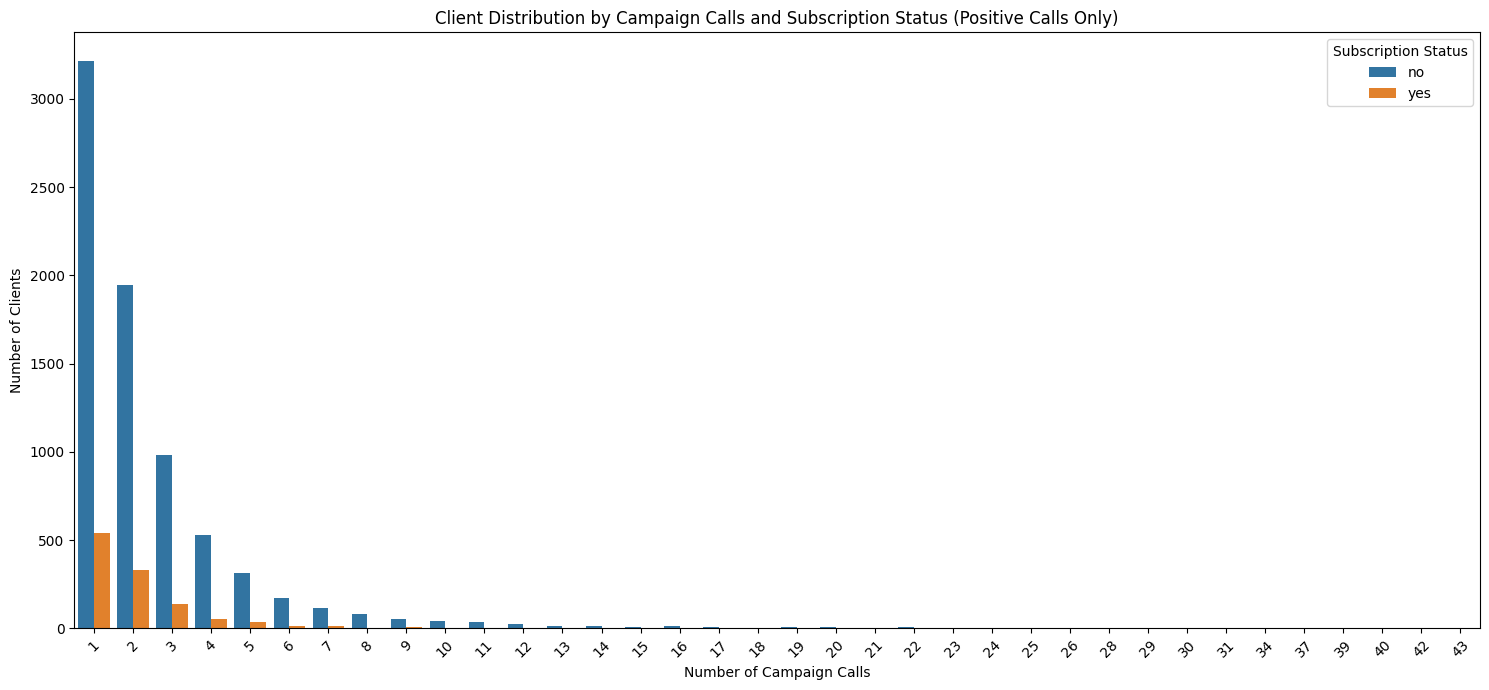

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out negative 'Campaign Calls' values
df_filtered_calls = df_cleaned[df_cleaned['Campaign Calls'] >= 0]

# Group data by 'Campaign Calls' and 'Subscription Status' and count Client IDs
grouped_campaign_data = df_filtered_calls.groupby(['Campaign Calls', 'Subscription Status'], observed=False)['Client ID'].nunique().reset_index()

# Sort by 'Campaign Calls' for better visualization
grouped_campaign_data = grouped_campaign_data.sort_values(by='Campaign Calls')

plt.figure(figsize=(15, 7))
sns.barplot(x='Campaign Calls', y='Client ID', hue='Subscription Status', data=grouped_campaign_data)
plt.xlabel('Number of Campaign Calls')
plt.ylabel('Number of Clients')
plt.title('Client Distribution by Campaign Calls and Subscription Status (Positive Calls Only)')
plt.legend(title='Subscription Status')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability if many categories
plt.tight_layout()
plt.show()

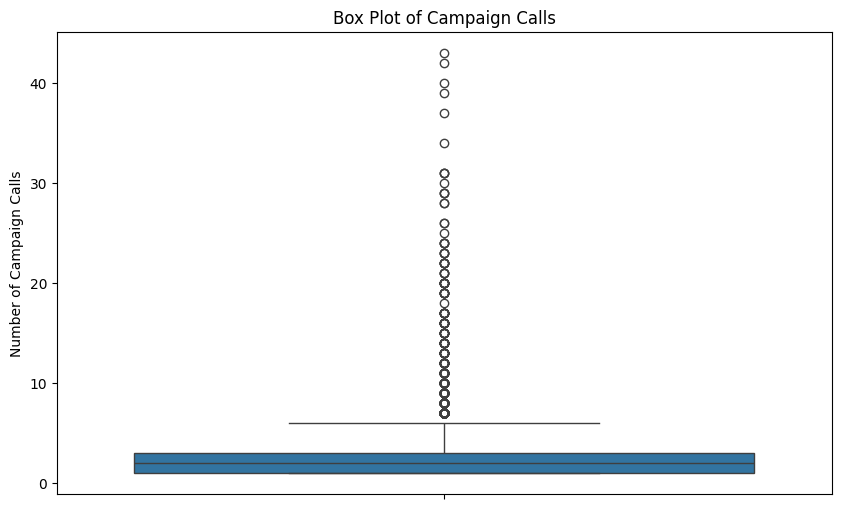

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_filtered_calls['Campaign Calls'])
plt.title('Box Plot of Campaign Calls')
plt.ylabel('Number of Campaign Calls')
plt.show()